In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import matplotlib as mpl
mpl.rcParams['xtick.major.size'] = 8
mpl.rcParams['xtick.minor.size'] = 4
mpl.rcParams['ytick.major.size'] = 8
mpl.rcParams['ytick.minor.size'] = 4

#mpl.rcParams['xtick.labelsize'] = 50
mpl.rc('text', usetex=True)
#mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
plt.rcParams['text.latex.preamble'] = r"\usepackage{bm} \usepackage{amsmath}"

In [3]:
# Color style for output sample points
de_pts = "#91bfdb" # Diver scan
rn_pts = "#fc8d59" # Random scan
gd_pts = "#ffffbf" # Grid scan

# Scan del modelo Long-lived dark Higgs and inelastic dark matter at Belle II

Se realiza un scan para el modelo usando un algoritmo genético conocido como Differential Evolution. En este scan se tiene presente el rango presente en la tabla: 

| Parámetros       | Rangos                | Escala       |
|------------------|-----------------------|--------------|
| $\epsilon$       | $10^{-6}$ a $10^{-1}$ | Log          |
| $M_{\chi_{1}}$   | $10^{-2}$ a $10^{1}$  | log          |
| f                | 0.01 a 0.2            | linear       |

<br>
<center> TABLA I: Rangos del scan.
<br>
    
| Parámetros       | Valores               | 
|------------------|-----------------------|
| $M_{A^{'}}$      | $4M_{\chi_{1}}$       | 
| $M_{\phi}$       | $1 $                  | 
    
<br>
<center> TABLA II: Parámetros de masa. 
<br>
    
| Parámetros       | Valores               | 
|------------------|-----------------------|
| $\theta$         | $10^{-5}$             | 
| $g_{X}$          | $1.12$                |

<br>
<center> TABLA III: Parámetros de acomplamiento.
<br>

La optimización se realiza teniendo presente una estrategia de best1bin, con una población de 75, una tolerancia de 0.01, mutación entre 0.7 y 1.99999, recombinación de 0.15 y una semilla generada aleatoriamente. Este programa se demoro en correr un aproximado de 365 minutos lo que corresponde a 6 horas y 5 minutos.


In [4]:
columns = ['logmchi1','gX','logepsilon','ff','reliq','chi']
#df1 = pd.read_csv('archivo_1_f0.10.csv',names = columns)
#df2 = pd.read_csv('archivo_1_f0.20.csv',names = columns)
#df3 = pd.read_csv('archivo_1_f0.28.csv',names = columns)
df = pd.read_csv('archivo_1_fvar.csv', names = columns)

In [5]:
#df1['Mchi1'] = 10**df1.logmchi1
#df2['Mchi1'] = 10**df2.logmchi1
#df3['Mchi1'] = 10**df3.logmchi1
df['Mchi1'] = 10**df['logmchi1']
df['Epsilon'] = 10**df['logepsilon']
df['likelihood'] = np.exp(-df.chi/2)

In [6]:
Lmax = min(df['chi'])
print("El valor minímo de loglike es:",Lmax)

El valor minímo de loglike es: 0.0


In [7]:
#data1 = df1[df1['chi']<= 5.56]
#data2 = df2[df2['chi']<= 5.56]
#data3 = df3[df3['chi']<= 5.56]
data1 = df[df['chi'] <= 5.56]
data2 = df[df['chi'] <= 2.30] 
#Nota revisar el valor para 2 sigma es alrededor de 2. algo no 2.60 

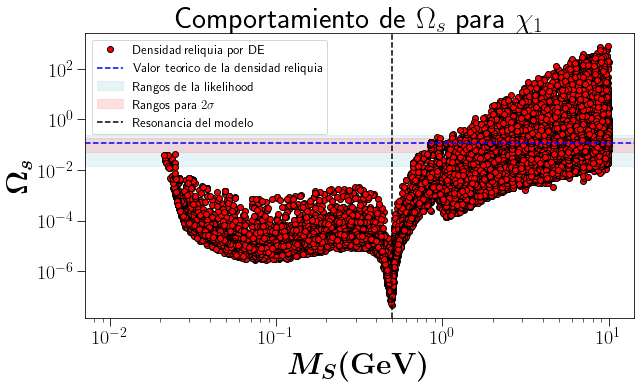

In [8]:
plt.figure(figsize=(9.0,5.5))
plt.plot(df.Mchi1,df.reliq,'ro',label='Densidad reliquia por DE', markeredgecolor='black')
plt.title(r'Comportamiento de $\Omega_{s}$ para $\chi_{1}$',size=30)
plt.axhline(y=0.12, color='blue', linestyle='--', label='Valor teorico de la densidad reliquia')
plt.axhspan(ymin=data1.reliq.min(), ymax=data1.reliq.max(), color='lightblue', alpha=0.3, label='Rangos de la likelihood')
plt.axhspan(ymin=data2.reliq.min(), ymax=data2.reliq.max(), color='#FF9999', alpha=0.3, label='Rangos para $2\sigma$')
plt.axvline(x=0.5, color='black', linestyle='--', label='Resonancia del modelo')
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\Omega_{s}}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('comportamiento de la densidad reliquia.png')

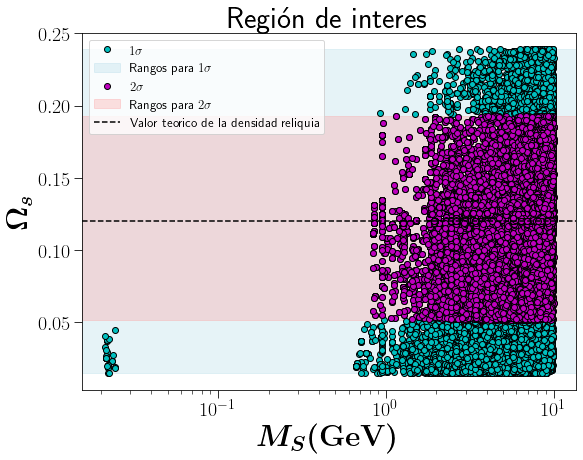

In [9]:
plt.figure(figsize=(8.2,6.5))
plt.plot(data1.Mchi1,data1.reliq,'co',label='$1\sigma$', markeredgecolor='black')
plt.axhspan(ymin=data1.reliq.min(), ymax=data1.reliq.max(), color='lightblue', alpha=0.3, label='Rangos para $1\sigma$')
plt.plot(data2.Mchi1,data2.reliq,'mo',label='$2\sigma$', markeredgecolor='black')
plt.axhspan(ymin=data2.reliq.min(), ymax=data2.reliq.max(), color='#FF9999', alpha=0.3, label='Rangos para $2\sigma$')
plt.title(r'Región de interes',size=30)
plt.axhline(y=0.12, color='black', linestyle='--', label='Valor teorico de la densidad reliquia')
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\Omega_{s}}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.legend(fontsize=13)
plt.tight_layout()
plt.savefig('Region_de_interes.png')

In [10]:
data1['rff'] = round(data1['ff'],3)

/tmp/ipykernel_5602/1147026771.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['rff'] = round(data1['ff'],3)


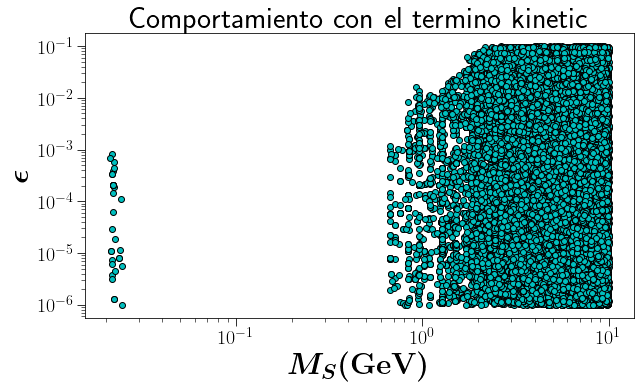

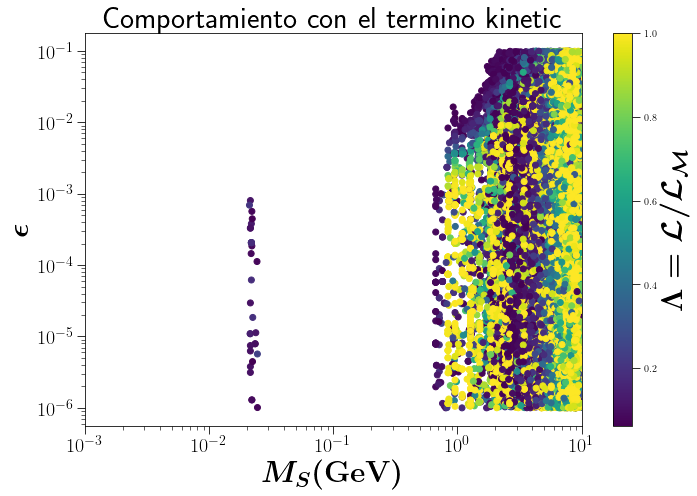

In [11]:
plt.figure(figsize=(9.0,5.5))
plt.plot(data1.Mchi1,data1.Epsilon,'co', markeredgecolor='black')
plt.title(r'Comportamiento con el termino kinetic',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.tight_layout()
plt.savefig('Analisis_del_termino_kinetic.png')
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(data1.Mchi1,data1.Epsilon,c=data1.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento con el termino kinetic',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()
plt.show()

In [12]:
datosf01 = data1[(data1['rff']> 0.09) & (data1['rff']<0.11)]
datosf0012 = data1[data1['rff'] == 0.012]
datosf0013 = data1[data1['rff'] == 0.013]
datosf0015 = data1[data1['rff'] == 0.015]
#0.012 Genera antes de 0
#0.013 Genera en 0 
#0.015 Genera en 0 
#0.017 Genera entre 1 y 2
#0.018 Genera entre 1 y 2

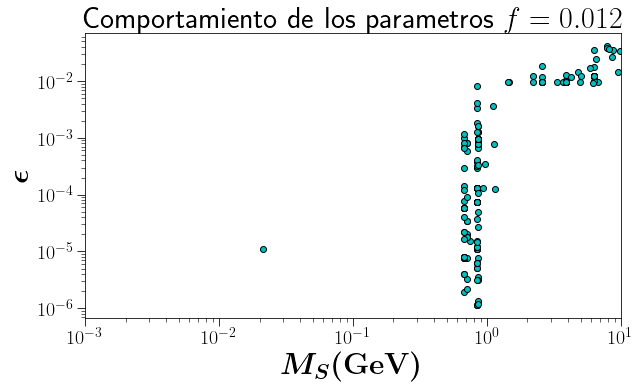

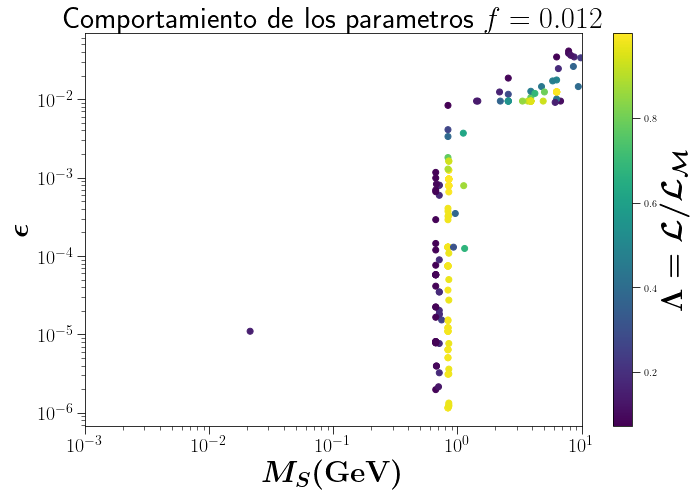

In [13]:
plt.figure(figsize=(9.0,5.5))
plt.plot(datosf0012.Mchi1,datosf0012.Epsilon,'co', markeredgecolor='black')
plt.title(r'Comportamiento de los parametros $f = 0.012$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()
plt.savefig('comportamiento para f = 0.12.png')
plt.show()

fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(datosf0012.Mchi1,datosf0012.Epsilon,c=datosf0012.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento de los parametros $f = 0.012$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()
plt.savefig('comportamiento para f = 0.12_lambda.png')
plt.show()

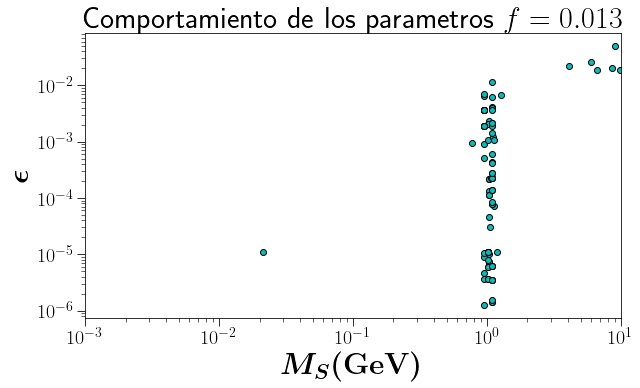

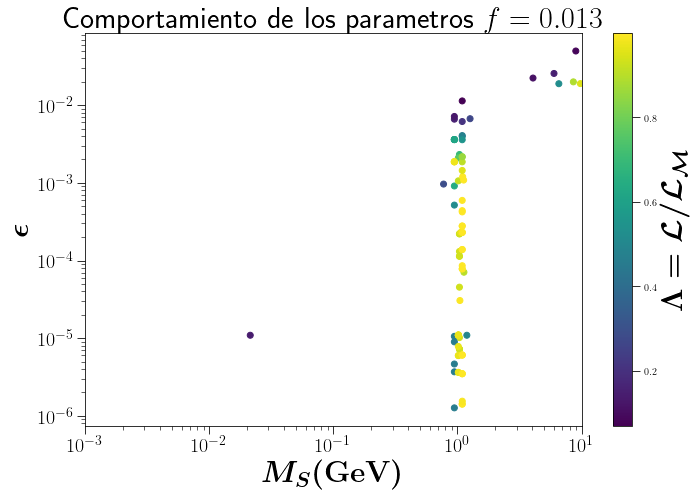

In [14]:
plt.figure(figsize=(9.0,5.5))
plt.plot(datosf0013.Mchi1,datosf0013.Epsilon,'co', markeredgecolor='black')
plt.title(r'Comportamiento de los parametros $f = 0.013$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()

fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(datosf0013.Mchi1,datosf0013.Epsilon,c=datosf0013.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento de los parametros $f = 0.013$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()
plt.show()

In [15]:
num_puntos = 500000

# Generar datos de fondo con Mchi1 entre 0.01 y 10 y Epsilon entre 10⁻⁶ y 10⁻¹
datosf0015_fondo = pd.DataFrame({
    'Mchi1': 10**np.random.uniform(np.log10(0.01), np.log10(10), num_puntos),
    'Epsilon': 10**np.random.uniform(np.log10(1e-6), np.log10(1e-1), num_puntos),
    'likelihood': np.zeros(num_puntos)  # Establecer c=0 para el fondo
})

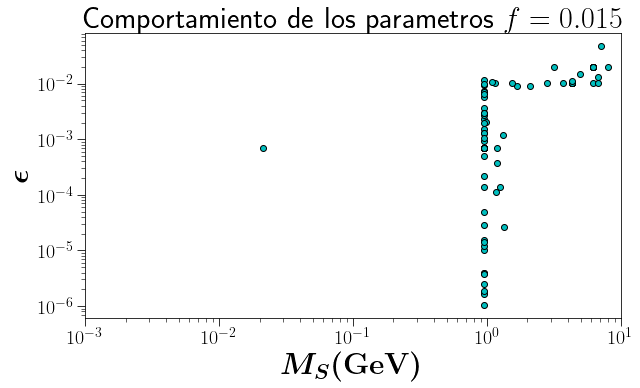

In [16]:
plt.figure(figsize=(9.0,5.5))
plt.plot(datosf0015.Mchi1,datosf0015.Epsilon,'co', markeredgecolor='black')
plt.title(r'Comportamiento de los parametros $f = 0.015$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()




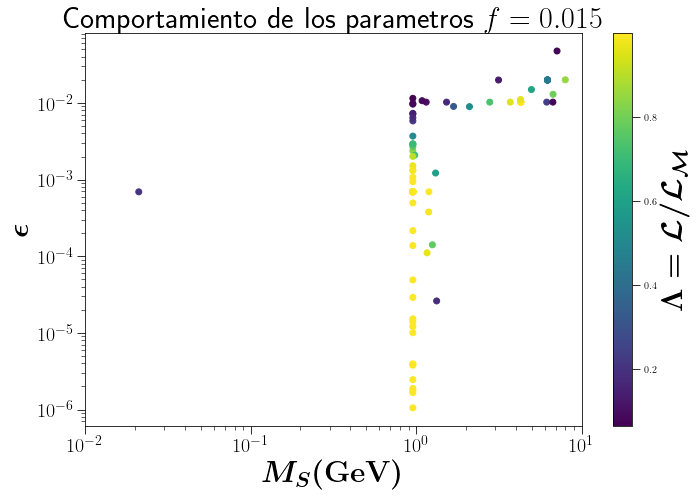

In [17]:
fig, ax = plt.subplots(figsize=(10,7))
#ax.scatter(datosf0015_fondo.Mchi1, datosf0015_fondo.Epsilon, c=datosf0015_fondo.likelihood, alpha=0.5, marker='.')
im = ax.scatter(datosf0015.Mchi1,datosf0015.Epsilon,c=datosf0015.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento de los parametros $f = 0.015$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,10)
plt.tight_layout()
plt.savefig('imagenpruebaSinFondo.png')
plt.show()

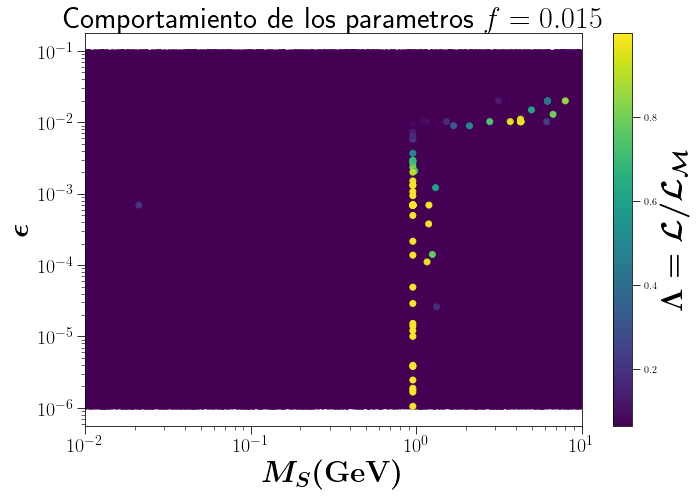

In [18]:
fig, ax = plt.subplots(figsize=(10,7))
#ax.scatter(datosf0015_fondo.Mchi1, datosf0015_fondo.Epsilon, c='black', alpha=0.5, marker='.')
ax.scatter(datosf0015_fondo.Mchi1, datosf0015_fondo.Epsilon, c=datosf0015_fondo.likelihood, alpha=0.5, marker='.')
im = ax.scatter(datosf0015.Mchi1,datosf0015.Epsilon,c=datosf0015.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento de los parametros $f = 0.015$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,10)
plt.tight_layout()
plt.savefig('imagenpruebaConFondo1.png')
plt.show()

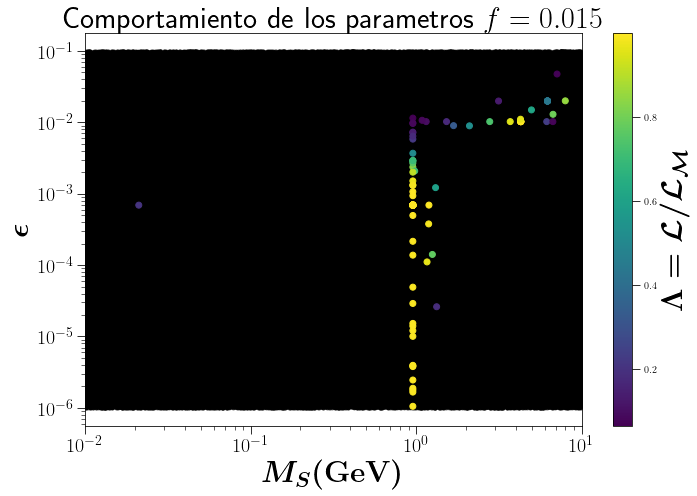

In [19]:
fig, ax = plt.subplots(figsize=(10,7))
ax.scatter(datosf0015_fondo.Mchi1, datosf0015_fondo.Epsilon, c='black', alpha=0.5, marker='.')
#ax.scatter(datosf0015_fondo.Mchi1, datosf0015_fondo.Epsilon, c=datosf0015_fondo.likelihood, alpha=0.5, marker='.')
im = ax.scatter(datosf0015.Mchi1,datosf0015.Epsilon,c=datosf0015.likelihood,cmap='viridis')
cbar = fig.colorbar(im)
cbar.set_label(r'$\boldsymbol{\Lambda = \mathcal{L}/\mathcal{L_{M}}}$', fontsize=30)
plt.title(r'Comportamiento de los parametros $f = 0.015$',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.01,10)
plt.tight_layout()
plt.savefig('imagenpruebaConFondo2.png')
plt.show()

In [20]:
def agrupar(df_,var1,var2,Nx_,Ny_):
    bins1 = np.linspace(df_[var1].min(), df_[var1].max(), Nx_)
    bins2 = np.linspace(df_[var2].min(), df_[var2].max(), Ny_)
    labels1 = range(Nx_ - 1)
    labels2 = range(Ny_ - 1)
    df_['Grupo1'] = pd.cut(df_[var1], bins=bins1, labels=labels1, include_lowest=True)
    df_['Grupo2'] = pd.cut(df_[var2], bins=bins2, labels=labels2, include_lowest=True)
    return df_

def conjunto(df_, nombre_, valor_):
    return pd.DataFrame([df_.iloc[j] for j, i in enumerate(df_[nombre_]) if i == valor_])

In [21]:
dfmodificado = agrupar(datosf0012,'Mchi1','Epsilon',100,100)
#dfmodificado

/tmp/ipykernel_5602/2274835339.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Grupo1'] = pd.cut(df_[var1], bins=bins1, labels=labels1, include_lowest=True)
/tmp/ipykernel_5602/2274835339.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Grupo2'] = pd.cut(df_[var2], bins=bins2, labels=labels2, include_lowest=True)


In [22]:
Nx = 100
Ny = 100
bins1 = np.linspace(datosf0012.Mchi1.min(),datosf0012.Mchi1.max(), Nx)
bins2 = np.linspace(datosf0012.Epsilon.min(), datosf0012.Epsilon.max(), Ny)
labels1 = range(Nx - 1)
labels2 = range(Ny - 1)
#Separamos los valores en el rango de 100, usamos include_lowest para evitar generar valores del tipo Nan en los 
#numeros negativos
datosf0012['Grupo1'] = pd.cut(datosf0012.Mchi1, bins=bins1, labels=labels1, include_lowest=True)
datosf0012['Grupo2'] = pd.cut(datosf0012.Epsilon, bins=bins2, labels=labels2, include_lowest=True)
#Creamos 2 grupos, para poder analizar en 2 dimensiones.

/tmp/ipykernel_5602/4120176447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosf0012['Grupo1'] = pd.cut(datosf0012.Mchi1, bins=bins1, labels=labels1, include_lowest=True)
/tmp/ipykernel_5602/4120176447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosf0012['Grupo2'] = pd.cut(datosf0012.Epsilon, bins=bins2, labels=labels2, include_lowest=True)


In [23]:
datosf0012

,logmchi1,gX,logepsilon,ff,reliq,chi,Mchi1,Epsilon,likelihood,rff,Grupo1,Grupo2
380,-0.146392,1.12,-5.490240,0.011551,0.0372,3.404365,0.713852,0.000003,0.182285,0.012,6,0
633,0.896206,1.12,-1.384866,0.011659,0.0202,4.969880,7.874190,0.041223,0.083331,0.012,79,98
1213,0.409628,1.12,-1.937018,0.011564,0.0492,2.476348,2.568194,0.011561,0.289913,0.012,25,27
1284,-0.175039,1.12,-4.117862,0.011755,0.0195,5.040542,0.668284,0.000076,0.080438,0.012,6,0
1505,-0.146392,1.12,-3.226084,0.011551,0.0367,3.446236,0.713852,0.000594,0.178509,0.012,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...
29051,-0.069630,1.12,-3.019435,0.012258,0.1190,0.000467,0.851864,0.000956,0.999767,0.012,8,2
44741,0.624191,1.12,-1.926085,0.012403,0.0807,0.747892,4.209115,0.011855,0.688014,0.012,42,28
59654,-0.017337,1.12,-3.457907,0.012049,0.1880,1.964783,0.960866,0.000348,0.374415,0.012,9,0
84763,0.934332,1.12,-1.582283,0.012373,0.0563,1.997193,8.596697,0.026165,0.368396,0.012,86,62


In [24]:
datos_max = []
a = 0
for k in range(Nx-1):
    datos = conjunto(datosf0012,'Grupo1',k)
    #print(datos)
    #print(k)
    #print(datos['Grupo2'])
    
    try:
        for m in set(datos.Grupo2): 
            valor = conjunto(datos,'Grupo2',m)['likelihood'].max()
            elemento = [bins1[int(k)],bins2[int(m)],valor]
            datos_max.append(elemento)
    except: 
        a+= 1
df_fr = pd.DataFrame(datos_max,columns=['Mchi1','Epsilon','likelihood'])
df_fr.head()

,Mchi1,Epsilon,likelihood
0,0.021330,0.000001,0.150290
1,0.617415,0.000001,0.182285
2,0.617415,0.000418,0.178509
3,0.617415,0.000834,0.079223
4,0.716762,0.000001,0.249478


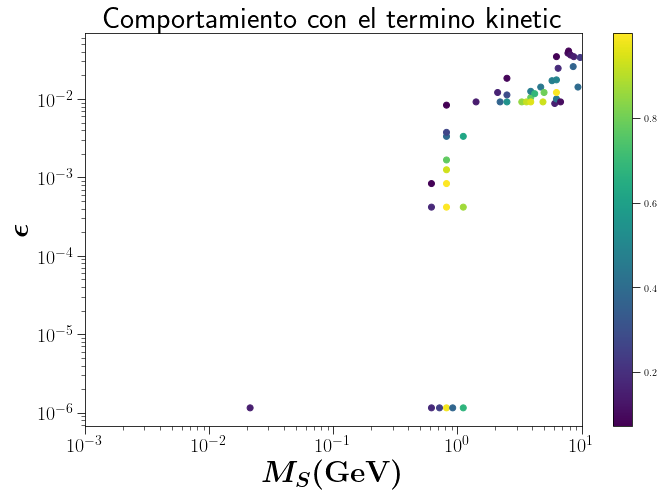

In [25]:
fig, ax = plt.subplots(figsize=(10,7))
im = ax.scatter(df_fr.Mchi1,df_fr.Epsilon,c=df_fr.likelihood,cmap='viridis')
fig.colorbar(im)
plt.title(r'Comportamiento con el termino kinetic',size=30)
plt.xlabel(r'$\boldsymbol{M_{S}\rm(GeV)}$',size=30)
plt.ylabel(r'$\boldsymbol{\epsilon}$',size=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xscale('log')
plt.yscale('log')
plt.xlim(0.001,10)
plt.tight_layout()
#ax.set_facecolor('#541352FF')
#plt.title(name)
#plt.ylabel(name2)
#plt.xlabel(name1)
plt.show()

In [26]:
'''
    #print(df.Grupo2)
    #set lo usamos para eliminar los elementos repetidos del grupo2 y no repetir los mismos elementos varias veces
    for m in set(datos.Grupo2):  
        valor = conjunto(df_1,'Grupo2',m)['likelihood'].max()
        datos_max.append([bins1[int(k)],bins2[int(m)],valor])
        print(Valor)
    '''
'''        
datos_max = pd.DataFrame(datos_max,columns=['x1','x2','likelihood'])
print(len(datos_max))
'''

"        \ndatos_max = pd.DataFrame(datos_max,columns=['x1','x2','likelihood'])\nprint(len(datos_max))\n"